# Introduction and Objective

<font face="Arial" size="4">Data Set</font>

Initial data set is made up of Coca Cola's stock data in the timeframe of 2019-01-20 to 2024-01-20 and was retrieved from Yahoo Finances.
This data consists of 7 features...
1. Date: This is a categorical feature that represents the specific day stock data was collected
2. Open: This is a numerical feature that represents stock price at the startof the day
3. High: This is a numerical feature that represents the highest stock price in a given day
4. Low: This is a numerical feature that represents the lowest stock price in a given day
5. Close: This is a numerical feature that represents the stock price at the end of the day
6. Adj Close: This is a numerical feature that represents the adjusted closing
7. Volume: This is a numerical feature that represents how many shares were traded in a given day

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming the dataset is a CSV file
# Replace 'your_dataset.csv' with the actual file name or path
df = pd.read_csv('DATA/COKE.csv')

# Displaying the first few rows of the dataset
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-22,208.000000,209.500000,204.270004,208.110001,203.525024,22300
1,2019-01-23,207.619995,214.429993,205.759995,213.809998,209.099426,20900
2,2019-01-24,212.080002,216.639999,210.850006,213.759995,209.295258,17300
3,2019-01-25,213.210007,217.949997,211.199997,211.619995,207.199966,26600
4,2019-01-28,212.000000,213.169998,203.809998,211.360001,206.945358,17300


<font face="Arial" size="4">Basic Description</font>

Data set includes 1258 entries and has no holes.

In [ ]:
# Shape of the dataset
print("Dataset Shape:", df.shape)

# Data types of the columns
print("\nData Types:\n", df.dtypes)

# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())

<font face="Arial" size="4">Descriptive Statistics</font>

The standard variation shows moderate volitality. Since it is around the $105-$107 range. The maximum volume of shares traded in a single day was much higher than the average at 11,970,000, indicating a day of particularly high trading activity. The prices (Open, High, Low, Close, and Adjusted Close) are quite close together. This could mean that on most days there wasn't a signficant difference in opening and closing days.

In [2]:
# Descriptive staatistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,417.016565,423.594881,410.600135,417.029698,412.963924,42068.918919
std,163.925650,166.128775,161.957744,164.127473,165.077853,38409.532871
min,192.300003,200.330002,188.080002,192.570007,189.199829,4700.000000
25%,273.712501,277.812500,271.272492,274.067505,269.370819,25900.000000
50%,395.080002,401.380005,391.804993,396.125000,391.479416,34900.000000
75%,529.662491,538.227509,520.022522,530.769989,528.686570,47375.000000
max,953.559998,961.909973,929.000000,949.000000,949.000000,989600.000000


<font face="Arial" size="4">Data Distribution</font>

The histogram for Volume is right skewed, indicating trading days have lower volume. 
The rest of the histograms also show a right skew, indicating that the stock prices were frequently lower. 

For every histogram besides Volume the whiskers extend past the range indicating some potential outliers. 

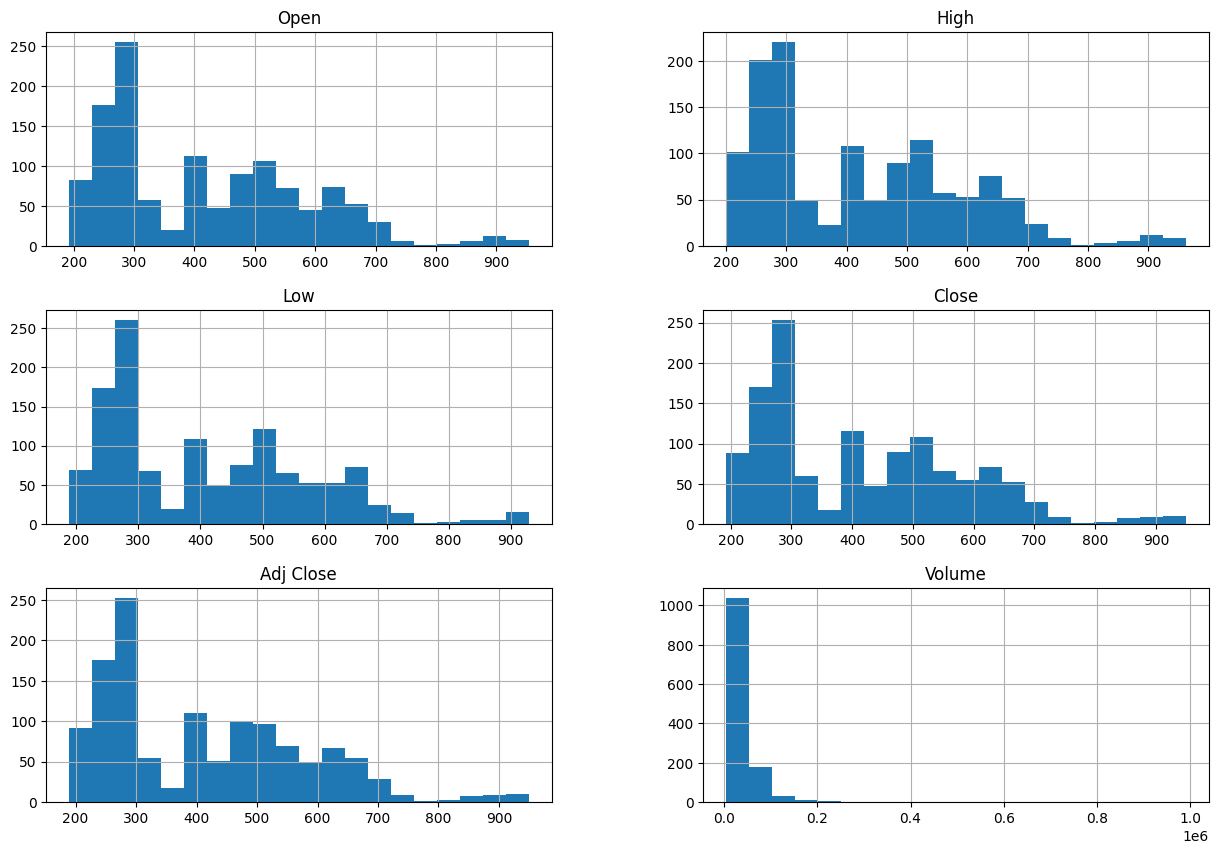

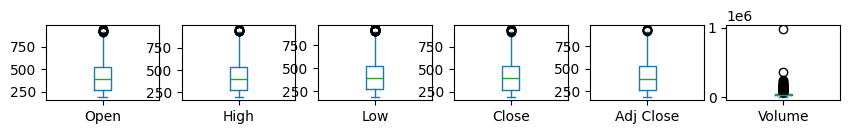

In [3]:
# Histograms for all numeric columns
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Box plots for all numeric columns
df.plot(kind='box', subplots=True, layout=(7,7), figsize=(12, 8))
plt.show()

<font face="Arial" size="4">Correlation Analysis</font>

Correlation matrix confirms that the stock price related features are so close together that we can simply merge these into a single column by averaging
these values for each row, which will give us our target variable.

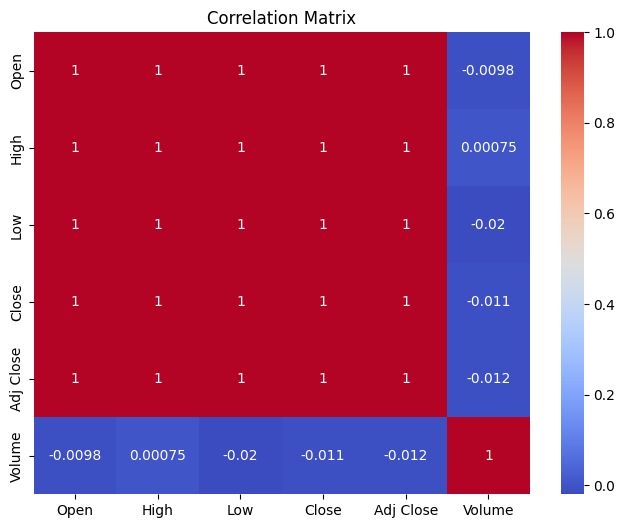

In [4]:
numerical_df = df.select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = numerical_df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing

Create a new column made up of the averages of the columns associated with stock price.

In [5]:
# Create a new column 'average_column' containing the average of the four columns
df['Average Price'] = df[['Open', 'Close', 'High', 'Low', 'Adj Close']].mean(axis=1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Average Price
0,2019-01-22,208.000000,209.500000,204.270004,208.110001,203.525024,22300,206.681006
1,2019-01-23,207.619995,214.429993,205.759995,213.809998,209.099426,20900,210.143881
2,2019-01-24,212.080002,216.639999,210.850006,213.759995,209.295258,17300,212.525052
3,2019-01-25,213.210007,217.949997,211.199997,211.619995,207.199966,26600,212.235992
4,2019-01-28,212.000000,213.169998,203.809998,211.360001,206.945358,17300,209.457071


Create 3 columns for temporal data 'Day', 'Month', 'year'.

In [6]:
import pandas as pd

# Assuming 'date_column' is the column containing date strings in 'YYYY-MM-DD' format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
# Display the updated DataFrame
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Average Price,Day,Month,year
0,2019-01-22,208.000000,209.500000,204.270004,208.110001,203.525024,22300,206.681006,22,1,2019
1,2019-01-23,207.619995,214.429993,205.759995,213.809998,209.099426,20900,210.143881,23,1,2019
2,2019-01-24,212.080002,216.639999,210.850006,213.759995,209.295258,17300,212.525052,24,1,2019
3,2019-01-25,213.210007,217.949997,211.199997,211.619995,207.199966,26600,212.235992,25,1,2019
4,2019-01-28,212.000000,213.169998,203.809998,211.360001,206.945358,17300,209.457071,28,1,2019


Create a new column representing the previous price.

In [7]:
# Create the 'Previous Price' column
df['Previous Price'] = df['Average Price'].shift(1)
df.at[0, 'Previous Price'] = df.at[0, 'Average Price']
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Average Price,Day,Month,year,Previous Price
0,2019-01-22,208.000000,209.500000,204.270004,208.110001,203.525024,22300,206.681006,22,1,2019,206.681006
1,2019-01-23,207.619995,214.429993,205.759995,213.809998,209.099426,20900,210.143881,23,1,2019,206.681006
2,2019-01-24,212.080002,216.639999,210.850006,213.759995,209.295258,17300,212.525052,24,1,2019,210.143881
3,2019-01-25,213.210007,217.949997,211.199997,211.619995,207.199966,26600,212.235992,25,1,2019,212.525052
4,2019-01-28,212.000000,213.169998,203.809998,211.360001,206.945358,17300,209.457071,28,1,2019,212.235992


Since the model is designed to predict future stock prices of a company, rather than randomly splitting the data we chose to predict a full year. This allows us to run a more practical test on our model.

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

# Assuming 'Date' is your date column
cutoff_date = pd.to_datetime('2023-01-01')  # Adjust the cutoff date as needed

train_set = df[df['Date'] < cutoff_date]
test_set = df[df['Date'] >= cutoff_date]

# Features and target for training set
X_train = train_set[['Month', 'Day', 'year', 'Previous Price']]
y_train = train_set['Average Price']

# Features and target for testing set
X_test = test_set[['Month', 'Day', 'year', 'Previous Price']]
y_test = test_set['Average Price']

test_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Average Price,Day,Month,year,Previous Price
995,2023-01-03,515.409973,517.419983,470.000000,476.660004,472.182373,60800,490.334467,3,1,2023,513.461395
996,2023-01-04,479.149994,487.339996,472.000000,486.000000,481.434631,47400,481.184924,4,1,2023,490.334467
997,2023-01-05,484.910004,498.369995,479.100006,483.769989,479.225525,43200,485.075104,5,1,2023,481.184924
998,2023-01-06,485.049988,504.149994,483.510010,500.000000,495.303101,26200,493.602619,6,1,2023,485.075104
999,2023-01-09,501.279999,506.179993,488.589996,490.510010,485.902252,30100,494.492450,9,1,2023,493.602619


# Analytical Model Description

We will use a multiple linear regression model to predict the Open price of a stock based on historical data. The features taken into account will be Day, Month, year, and Previous Price. Which are presumed to influence the stock. The general idea of linear regression is to tie a coefficient to each feature and keep changing the coefficient until you get the combination of coefficients that yield the best result.

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow>
    <mi>Y</mi>
    <mo>=</mo>
    <msub>
      <mi>β</mi>
      <mn>0</mn>
    </msub>
    <mo>+</mo>
    <msub>
      <mi>β</mi>
      <mn>1</mn>
    </msub>
    <msup>
      <mi>X</mi>
      <mn>1</mn>
    </msup>
    <mo>+</mo>
    <msub>
      <mi>β</mi>
      <mn>2</mn>
    </msub>
    <msup>
      <mi>X</mi>
      <mn>2</mn>
    </msup>
    <mo>+</mo>
    <mo>…</mo>
    <mo>+</mo>
    <msub>
      <mi>β</mi>
      <mi>p</mi>
    </msub>
    <msup>
      <mi>X</mi>
      <mi>p</mi>
    </msup>
    <mo>+</mo>
    <mi>ϵ</mi>
  </mrow>
</math>


In this model 
Y is the dependent variable
β is the coefficient
X is the independent variable/feature(s)
ϵ is the error term

# Architectural Model

The data has been collected and preprocessed. We chose our features based on relevance. We split the data set training and testing 

Once trained, the model's performance is evaluated on the testing set using metrics like Mean Squared Error (MSE) or R-squared.

The residuals are analyzed to check the model's accuracy and assumptions.

The trained model will then be used to make predictions on unseen data. 

If the model preforms well, then it can be deployed to provide ongoing predictions. 

# Model Implementation

In order to implement the model we used pandas to load in the data, sklearn to build the model, matplotlib to visualize the data, and numpy for mathematical computations

# Assumptions Verification

This model assumes that a company's performance will stay mostly consistent with their past performance and doesn't anticipate any drastic changes. It's important to note that while the historical data is indicative of future performance, it can't take into account unforeseen external events or drastic market changes.

# Deployment

Our selected features were 'Month', 'Day', 'year', and 'Previous Price'. These combination of features allowed our model to learn patterns regarding time as well as learning patterns regarding how the previous price may affect the current price.

In [12]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create a linear regression model
linear_model = LinearRegression()

# Fit the linear model to the training data
linear_model.fit(X_train, y_train)

LinearRegression()

# Execution

Upon visual inspection, the predicted values match the actual values fairly well and the model is seemingly able to predict well for the upper and lower ranges.

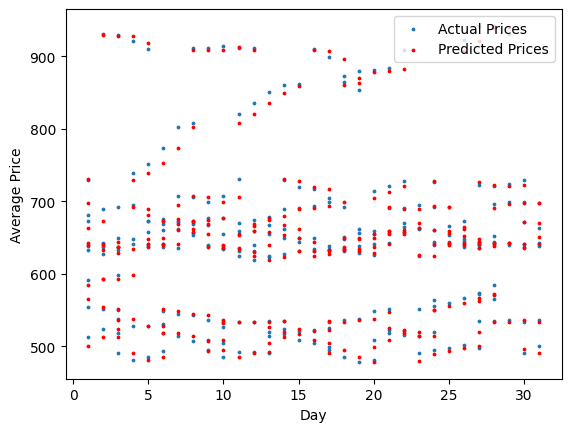

In [13]:
# Make predictions on the testing data
y_pred = linear_model.predict(X_test)

# Visualize the results (optional)
plt.scatter(X_test['Day'], y_test, label='Actual Prices', s = 3)
plt.scatter(X_test['Day'], y_pred, label='Predicted Prices', color='red', s = 3)
plt.xlabel('Day')
plt.ylabel('Average Price')
plt.legend()
plt.show()

# Results

The R^2 Score was 0.99. This is very close to one, indicating that our features are properly capturing the variance in our target variable 'Average Price.'

In [14]:
from sklearn.metrics import mean_absolute_error, r2_score, max_error
import numpy as np
# R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")


R-squared (R2): 0.992476402781879


# Error Estimation

To contextualize the error, our test set consists of the time period 2023-01-01 to 2024-01-01 which has a range of about 500 - 900. Considering this an average error of 6.5 is very good and a max error of 63 is acceptable. 

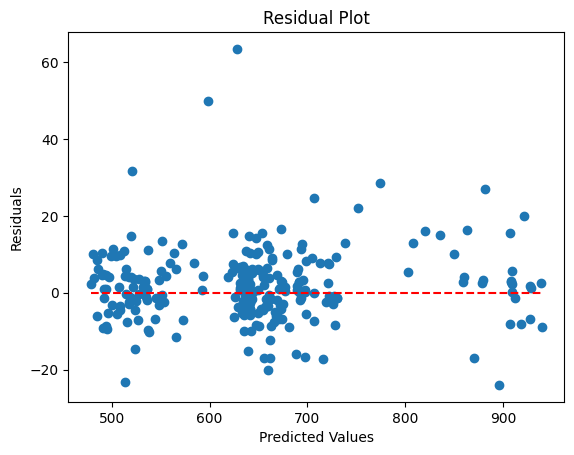

Mean Absolute Error (MAE): 6.52275054847263
Max Error (ME): 63.44249787323031


In [16]:
# Calculate residuals
residuals = y_test - y_pred

# Plotting the residuals
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
#max error
max_err = max_error(y_test, y_pred)
print(f"Max Error (ME): {max_err}")

# Model Validation

In order to validate the model we used a practical set of a consecutive year to better the model the intended purpose of the model. This subset of our original data includes the prices for the year 2023 up until the beginning of 2024.

Metrics like R^2 and MSE were used to evaluate the model.

A residual analysis was conducted to look for an biases. 

### Analysis ###


The Mean Squared Error (MAE) of 6.52, coupled with an R-squared value of 99%, reflects a model that captures a significant portion of the variance in the 'Open' prices. These performance metrics, particularly the R-squared value being close to 1, indicate a strong predictive power within the scope of the tested data.

A closer examination through residual analysis shows a random distribution of residuals around the zero line, with no apparent patterns or systematic deviations. This suggests that the model's predictions are not biased and that the variance of the errors is consistent across the spectrum of predictions.

Any minor deviations observed did not materially impact the model's performance, as evidenced by the validation results.

In conclusion, our analysis supports the model's effectiveness in a practical financial context. We recommend its use for informed decision-making with the caveat of continuous monitoring and periodic updates to adapt to new market data.

### Model improvement ###



In order to improve upon the model we tried various features and determined the overall impact on the model based on the R2 and error metrics. In the end we found that a balance temporal data as well as data regarding previous stock price proved to be most significant with the previous price feature being especially significant. Potential future improvements involve deriving more features from the original data set or getting a feature that more precisely captures seasonal patterns. 

# Final Conclusion

To conclude our key finding indicate that the most substantial deatures in predicting future stock prices is both temporal and lagged price data. Our model effectively captured the variance in stock prices with an R2 of about 99% and did so with a mean absolute error of around 6. Although our model captures the data well, it is quite possible that there are other features that can be derived or used to predict a company's performance such as reputation or public opinion (more societal factors). This analysis aids in predicting the performance of a company by analyzing their historical stock prices and predicting future prices. From the Christian Worldview, some factors to consider are: Ethical business practices, social responsibility, and environmental stewardship. This is because Christians are called to be honest, have integrity, and be fair to another, the Golden rule. A qualitative assessment can be  evaluating whether a company's core activities align with Christian values. A quantitative assessment can be  setting ESG(Environmental, Social, Governance) scores are a set of standards for a company's behavior used by socially conscious investors to screen potential investments. They can be used to quantitatively assess non-financial factors. The idea is that investments should not only avoid doing harm but should actively seek to do good, reflecting the broader Christian call to "love your neighbor as yourself" A quantitative model could be used to assess the financial viability and the potential social/environmental impact in measurable terms. A qualitative assessment would then be employed to evaluate more subjective factors and ensure that investments align with one's Christian values. For a Christian investor, the decision-making process involves not just seeking profit, but also doing so in a way that is responsible, ethical, and beneficial to others, reflecting the broader values and commandments of their faith.